This notebook loads a single image taken by a camera in the HPWREN or Alert Wildfire network, breaks it up into 299x299 sub-images, and passes each to the model for classification. If a sub-image is identified as positive for smoke, the image is flagged as containing smoke and the sub-image identified. 

In [1]:
# Setup
from tensorflow import keras
import tensorflow as tf
from keras.models import load_model
import numpy as np


In [2]:
# load saved model - NOTE: this takes a minute to load (it's 100mb)!
#model = tf.keras.models.load_model('MediumXception')
model = keras.models.load_model('MediumXception', compile=True)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 10, 10, 2048)      20861480  
_________________________________________________________________
flatten (Flatten)            (None, 204800)            0         
_________________________________________________________________
dense (Dense)                (None, 6)                 1228806   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 22,090,293
Trainable params: 22,035,765
Non-trainable params: 54,528
_________________________________________________________________


In [3]:
def displayMyImage(name):
    image_path = name
    image_size = (299,299)
    img = cv2.imread(image_path) # with the OpenCV function imread(), the order of colors is BGR (blue, green, red).
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converting BGR to RGB for Pillow
    display(Image.fromarray(img))

def getMyPrediction(name,model):
    image = tf.keras.preprocessing.image.load_img(name)
    input_arr = keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])  # Convert single image to a batch. 
    # Note: Xception expects a specific kind of input processing.
    # Before passing inputs to the model, call tf.keras.applications.xception.preprocess_input. 
    # It will scale scale input pixels between -1 and 1.
    x = preprocess_input(input_arr)
    predictions = model.predict(x)
    return(predictions[0][0])
    
def createSubImages(name):
    # load the image, get the image size
    image = cv2.imread(name)
    height, width, channels= image.shape
    print(width, 'X', height)
    #rows = 299
    #columns = 299
    num_blocks_wide = width/299
    num_blocks_high = height/299
    print('blocks across: ', num_blocks_wide, 'blocks down: ', num_blocks_high)
    
#def cropsubimages(columns,rows)


In [ ]:
path_to_img = r'C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\currentimage\Whittier3.jpg'
# Output directory for subimages
outputdirectory = r'C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages'
img = cv2.imread(path_to_img)
img_h, img_w, img_channels = img.shape
split_width = 299
split_height = 299



def start_points(size, split_size, overlap=0):
    points = [0]
    stride = int(split_size * (1-overlap))
    counter = 1
    while True:
        pt = stride * counter
        if pt + split_size >= size:
            points.append(size - split_size)
            break
        else:
            points.append(pt)
        counter += 1
    return points


X_points = start_points(img_w, split_width, 0.01)
Y_points = start_points(img_h, split_height, 0.01)

count = 0
name = 'splitted'
frmt = 'jpg'
  
# Change the current directory 
# to specified directory 
os.chdir(outputdirectory)

for i in Y_points:
    for j in X_points:
        split = img[i:i+split_height, j:j+split_width]
        cv2.imwrite('{}_{}.{}'.format(name, count, frmt), split)
        count += 1

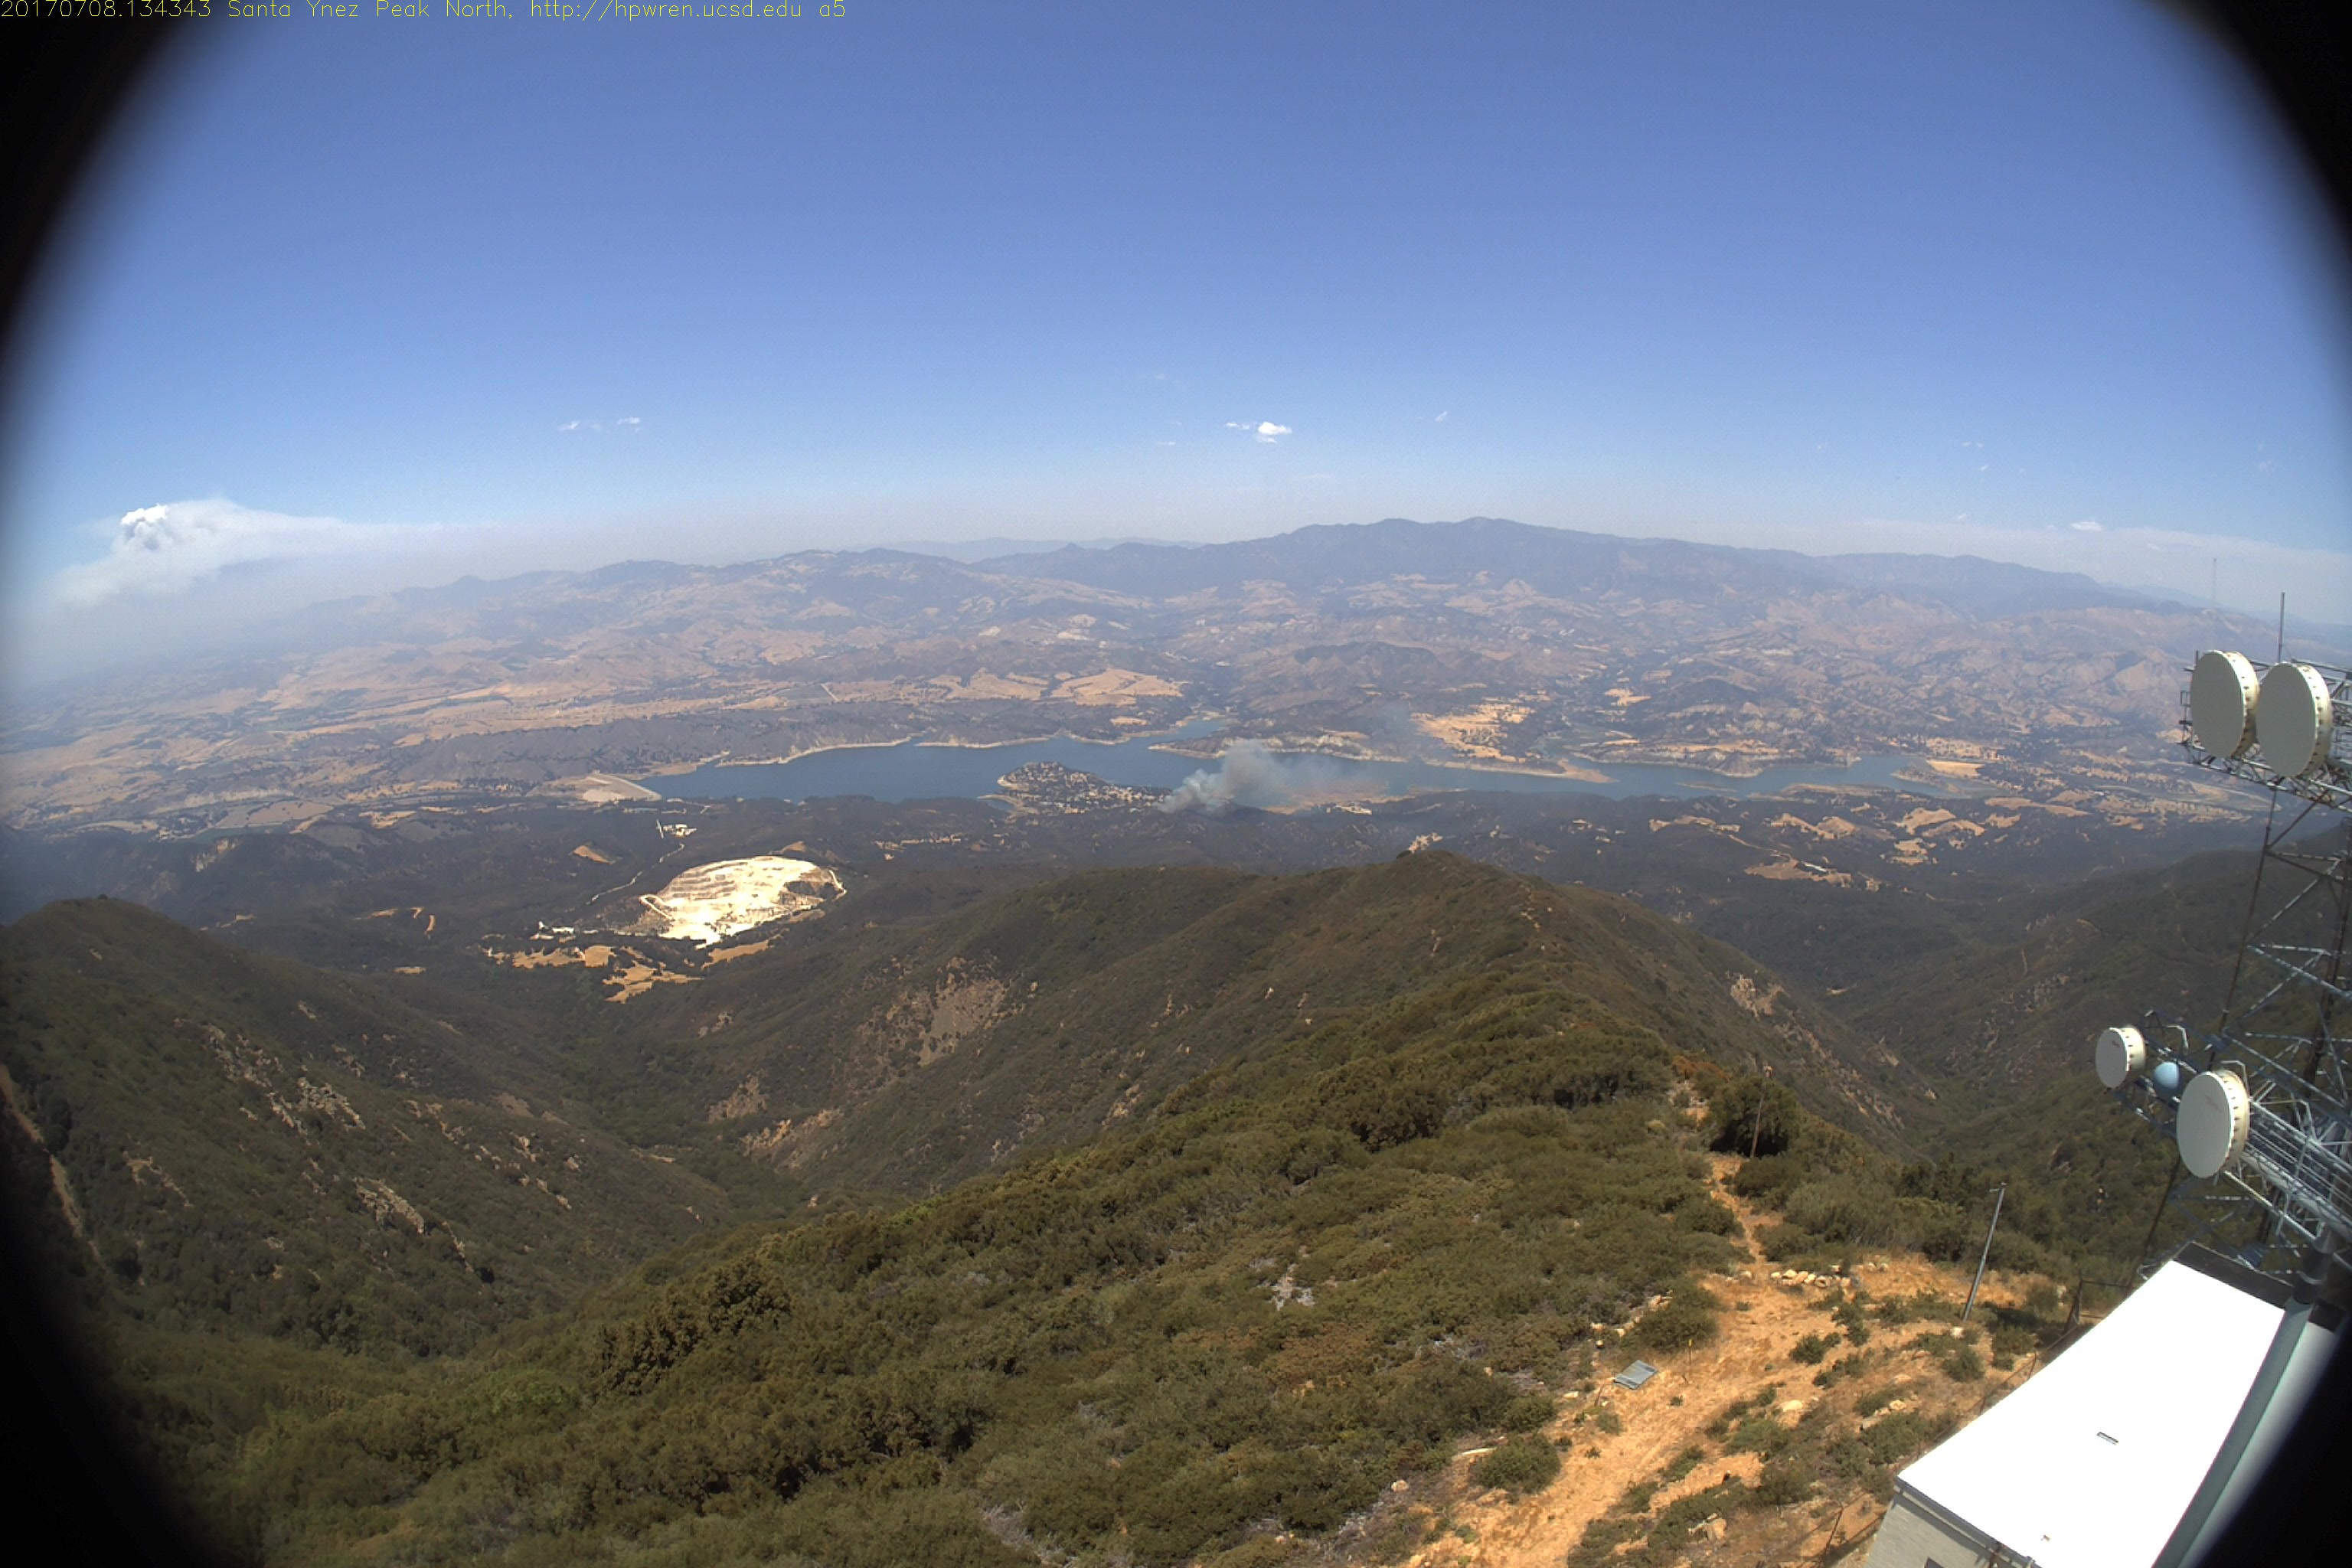

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\currentimage\Whittier3.jpg
subimage:  C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages\splitted_0.jpg
The image contains no smoke.
subimage:  C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages\splitted_1.jpg
The image contains no smoke.
subimage:  C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages\splitted_10.jpg
The image contains no smoke.
subimage:  C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages\splitted_11.jpg
The image contains no smoke.
subimage:  C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages\splitted_12.jpg
The image contains no smoke.
subimage:  C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages\splitted_13.jpg
The image contains no smoke.
subimage:  C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages\splitted_14.jpg
The image contains no smoke.
subimage:  C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages\splitted_15.jpg
The imag

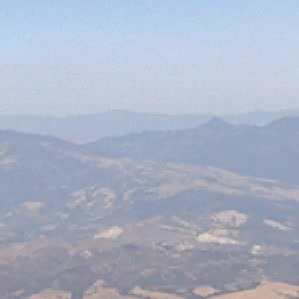

The image contains smoke - probability:  1.0
subimage:  C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages\splitted_27.jpg


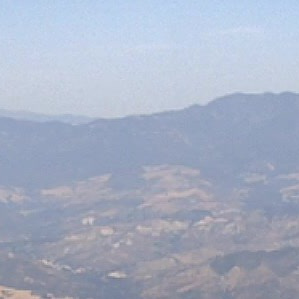

The image contains smoke - probability:  0.99999833
subimage:  C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages\splitted_28.jpg


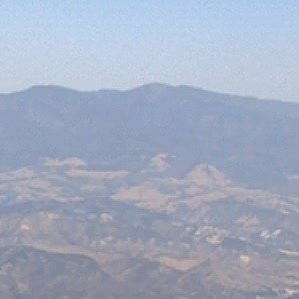

The image contains smoke - probability:  0.99986035
subimage:  C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages\splitted_29.jpg


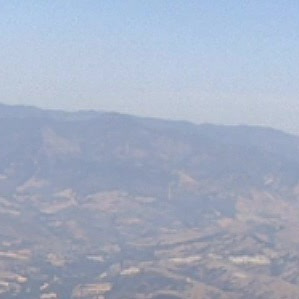

The image contains smoke - probability:  0.8688336
subimage:  C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages\splitted_3.jpg
The image contains no smoke.
subimage:  C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages\splitted_30.jpg


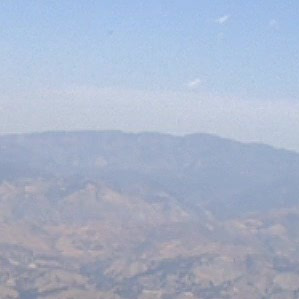

The image contains smoke - probability:  0.67535144
subimage:  C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages\splitted_31.jpg
The image contains no smoke.
subimage:  C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages\splitted_32.jpg
The image contains no smoke.
subimage:  C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages\splitted_33.jpg
The image contains no smoke.
subimage:  C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages\splitted_34.jpg
The image contains no smoke.
subimage:  C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages\splitted_35.jpg
The image contains no smoke.
subimage:  C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages\splitted_36.jpg
The image contains no smoke.
subimage:  C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages\splitted_37.jpg
The image contains no smoke.
subimage:  C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages\splitted_38.jpg
The image contains no smoke.
subi

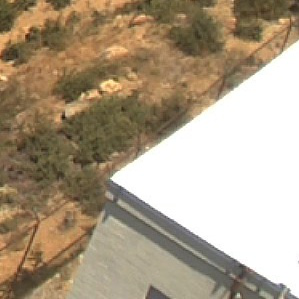

The image contains smoke - probability:  0.9726402
subimage:  C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages\splitted_75.jpg
The image contains no smoke.
subimage:  C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages\splitted_76.jpg


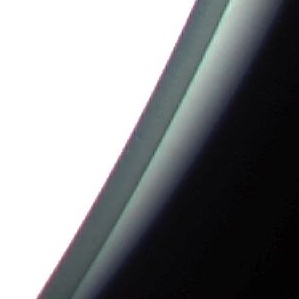

The image contains smoke - probability:  0.97376084
subimage:  C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages\splitted_8.jpg
The image contains no smoke.
subimage:  C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages\splitted_9.jpg
The image contains no smoke.


In [5]:
import os
from PIL import Image
import cv2 
from IPython.display import display
from tensorflow.keras.applications.xception import preprocess_input

path_to_image = r'C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\currentimage'
directory = path_to_image # folder containing a single, full-sized image to evaluate 
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        name = os.path.join(directory, filename)
        displayMyImage(name)
        print(name)
        # createSubImages(name)
    else:
        continue

directory = r'C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages' # cropped 299x299 subimages for the above image 
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        name = os.path.join(directory, filename)
        prediction = getMyPrediction(name,model)
        print('subimage: ',name)
              
        if prediction > 0.5:
            displayMyImage(name)
            print('The image contains smoke - probability: ', prediction)
        else:
            if prediction <= 0.5:
                print("The image contains no smoke.")
    else:
        continue
      


In [ ]:
directory = r'C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages' # set of 299x299 subimages 
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        subimage_name = os.path.join(directory, filename)
        displayMyImage(subimage_name)
        print(subimage_name)
        getMyPrediction(subimage_name,model)
    else:
        continue